# Introduction

In [2]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

# From SK Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, precision_recall_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Bike Share dataset:
bikes = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/bikes_sharing.csv')

In [5]:
# Changing the output variable to a category

# We are creating two categories - one will be binary, one will be multi-class

<AxesSubplot:xlabel='count', ylabel='Count'>

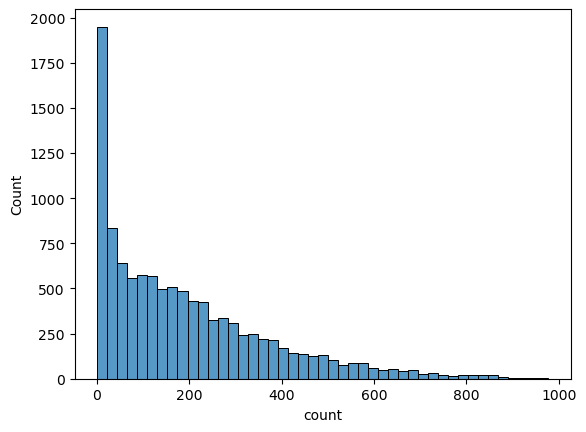

In [6]:
sns.histplot(bikes["count"])

In [7]:
# Top 30%, Top 50%, etc.
# 145 bikes or more as the midpoint for High vs. Low
bikes["count"].describe()


count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

In [8]:
# Binary output var > 1 = high number of rentals, 0 = low number of rentals
bikes["binary_output"] = bikes["count"].apply(lambda x: 1 if x >= 145 else 0)

In [9]:
# We need to do this transformation to create binary variables

In [10]:
bikes['multiclass_output'] = bikes['count'].apply(lambda x: 1 if x >= 0 and x <42 else 2 if x>= 42 and x <145 else 3 if x>=145 and x<284 else 4)

In [11]:
# Binary problem - logistic regression, KNN, Naive Bayes
# Check for data imbalance, we need to check number of groupings

# Since we used the median to determine 

# binary problem > we can use Logistic Regression, KNN and Naive Bayes to make predictions
# check for data balance
bikes.groupby('binary_output').count()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,multiclass_output
binary_output,,,,,,,,,,,,,
0,5431,5431,5431,5431,5431,5431,5431,5431,5431,5431,5431,5431,5431
1,5455,5455,5455,5455,5455,5455,5455,5455,5455,5455,5455,5455,5455


In [12]:
# Pre-processing - We will build a pipeline to do all of this.

# Split data into training and testing

# pre-processing - first split the data into training and testing
X = bikes[['season','holiday','workingday','weather','temp',    'atemp','humidity','windspeed']]
y = bikes['binary_output']

In [13]:
# 20-30% works for test size
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state= 42)

In [14]:
# Identifying the numerical and categorical columns
numeric_columns = ['temp','atemp','humidity','windspeed']
categorical_columns = ['season','holiday','workingday','weather']

In [15]:
# Column Transformer - to scale the numeric columns and one-hot encode the categoricals
# We haven't actually scaled


# create a Column Transformer to SCALE the numeric columns and OneHotEncode the categoricals
preprocessor = ColumnTransformer(
    transformers=[('num',MinMaxScaler(),numeric_columns),
                  ('cat',OneHotEncoder(),categorical_columns)]
)

# Standard Scaler - removes mean, sets to 0
# Power Transformer - normalize your data, follow as close as possible for normal distribution - negative, Yeo Johnson transformer
# Yeo Johnson - positive and negative values, 
# Box Cox transformer - allowing for positive values

# Normal distribution - quantile distribution

# There are many different types of transformers

# Min Max - scale between 0 and 1, but whatever it is, so if you're using models that aren't sensitive to data, then use MM
# Assume distribution follower - Standard Scaler / Power - normalize -> Lienar Regression model - as close as possible


# Non-linear models - don't need a standard scaler, use MM scaler

In [16]:
"""https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
"""

'https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html\nhttps://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html\nhttps://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html\nhttps://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html\n'

In [17]:
# For each model, we will run cross-validation
# When we have three possible models, so you'd want to compare with cross-validation

In [18]:
# Set them up 
knn = KNeighborsClassifier()
logreg = LogisticRegression()
nb = GaussianNB()

In [19]:
# Knn_Score

# More than 60%, less than 30%, imbalanced, i.e. worse than 60-40
# Be careful, certain models will be able and not be able handle
# F1-Score will handle 

# use F1-score if there's data imbalance, accuracy works here ok since we have balanced data
knn_score = cross_val_score(knn, X_train, y_train, scoring = "accuracy", cv=5)
logreg_scores = cross_val_score(logreg, X_train, y_train, scoring = "accuracy", cv=5)
nb_score = cross_val_score(nb, X_train, y_train, scoring = "accuracy", cv=5)

c:\Users\chris\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\chris\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [20]:
print(np.mean(knn_score))
print(np.mean(logreg_scores)) # This is the best for accuracy
print(np.mean(nb_score))

# While LogReg is the best, we will work with KNN to see how to hypertune for hyper-parameters

0.7095800524934385
0.7276902887139107
0.6943569553805775


In [21]:
# Build the pipeline

# Set up Pipeline
pipeline = Pipeline(steps= [
    ("preprocessor", preprocessor),
    ('classifier', KNeighborsClassifier())]
                    )

In [22]:
# set up params grid
# Find the optimal parameters

params_grid = {
    'classifier__n_neighbors': [5,25,55,105,375,575], # Reasonable versus the size of your data. Around 10%
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan'],
}

In [23]:
# Grid Search - will do it for you, run
KNeighborsClassifier(n_neighbors=5, weights = 'uniform', metric = 'euclidean')

KNeighborsClassifier(metric='euclidean')

In [28]:
a=  len(bikes) *0.1

a

1088.6000000000001

In [25]:
# Grid-Search 
grid_search = GridSearchCV(pipeline, params_grid, cv = 5, verbose = 1, scoring = "accuracy") # 6 x 5 times each, so 30 times

In [26]:
# Fit the Model
grid_search.fit(X_train, y_train) 

Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\chris\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\chris\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

KeyboardInterrupt: 

In [ ]:
print(grid_search.best_params_)

{'classifier__metric': 'euclidean', 'classifier__n_neighbors': 5, 'classifier__weights': 'uniform'}


In [ ]:
# To set up our final pipeline, we can set up first our final model
final_classifier = KNeighborsClassifier(n_neighbors=grid_search.best_params_['classifier__n_neighbors'],
                                        metric=grid_search.best_params_['classifier__metric'],
                                        weights=grid_search.best_params_['classifier__weights'])

In [51]:
final_pipeline = Pipeline(steps = [
    ('preprocessor',preprocessor),
    ('classifier',final_classifier)
])

In [52]:
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['temp', 'atemp', 'humidity',
                                                   'windspeed']),
                                                 ('cat', OneHotEncoder(),
                                                  ['season', 'holiday',
                                                   'workingday',
                                                   'weather'])])),
                ('classifier', KNeighborsClassifier(metric='euclidean'))])

In [59]:
final_pipeline.predict(X_test)

c:\Users\chris\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [58]:
# KNN is not a probabilistic model, but it does offer a predict_proba() function if we want to use it for threshold adjustment
final_pipeline.predict_proba(X_test)

array([[0.2, 0.8],
       [1. , 0. ],
       [0.8, 0.2],
       ...,
       [0.8, 0.2],
       [0. , 1. ],
       [0.8, 0.2]])

In [60]:
predictions = final_pipeline.predict(X_test)

c:\Users\chris\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [61]:
# KNN is not a probabilistic model, but it does offer a predict_proba() function if we want to use it for threshold adjustment
probabilities = final_pipeline.predict_proba(X_test)

In [62]:
# after tuning the model with hyperparameters, accuracy score improved 3%
accuracy_score(y_test, predictions)

0.7385180649112064

In [63]:
precision_score(y_test, predictions)

0.759765625

In [64]:
recall_score(y_test, predictions)

0.7064164648910412

In [65]:
f1_score(y_test, predictions)

0.7321204516938519

In [ ]:
# is the model good enough? If you're using it for bike sharing use case.

# It depends on what you value, like precision 